In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression

# Bike rental data sets locations
BIKE_RENTAL_DATA_LOC='../datasets/bike_rental/day.csv'

In [13]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

In [23]:
data = pd.read_csv(BIKE_RENTAL_DATA_LOC)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [64]:
X = data[['temp','atemp','hum']]
y = data['cnt']
reg = LinearRegression().fit(X, y)
data['prediction'] = reg.predict(X)
data['residual'] = data.prediction - data.cnt
data['lowess'] = lowess(pd.core.series.Series(data.index), data.residual)

In [79]:
auto_correlation_1lag = autocorr(data.cnt)

Auto correlation 1-lag: 0.8485882789471049


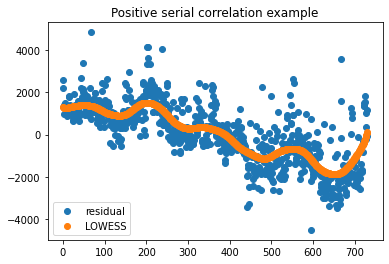

In [82]:
plt.scatter(data.index, data['residual'])
plt.scatter(data.index, data['lowess'])
plt.title('Positive serial correlation example')
plt.legend(['residual','LOWESS']) #LOWESS (Locally Weighted Scatterplot Smoothing)
print(f'Auto correlation 1-lag: {auto_correlation_1lag[0][1]}')

Resources:<br>
[1] https://www.statisticshowto.com/lowess-smoothing/ <br>
[2] https://towardsdatascience.com/lowess-regression-in-python-how-to-discover-clear-patterns-in-your-data-f26e523d7a35 <br>
[3] https://online.stat.psu.edu/stat501/lesson/4/4.5 <br>
[4] https://en.wikipedia.org/wiki/Autocorrelation <br>
[5] https://www.investopedia.com/terms/a/autocorrelation.asp <br>